In [1]:
import os
# Set OMP_NUM_THREADS to 1 to avoid KMeans memory leak on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import librosa
import numpy as np
import os
import librosa
import os
import soundfile as sf
import numpy as np
from scipy.signal import stft
from sklearn.metrics import mean_squared_error
import mir_eval

In [3]:
import pandas as pd 
import pandas as pd
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

In [4]:
dataset_directory = 'C:/Users/Mostafa Abady/Desktop/massive_mic_array_dataset'


In [ ]:
# Example: Load the chirp signal from the 'sources' directory
chirp_file = os.path.join(dataset_directory, "sources/chirp.wav")
chirp_audio, chirp_sr = librosa.load(chirp_file, sr=48000)
# MFCC 
mfcc_chirpp = np.mean(librosa.feature.mfcc(y=chirp_audio, sr=chirp_sr,n_mfcc=40).T, axis=0)
labels_chirp = ['chirp_roo'] * len(mfcc_chirpp.reshape(1,-1))
mfcc_chirpp=mfcc_chirpp.reshape(1,-1)

In [ ]:
# Create empty lists to store audio data and sample rates
mfcc_audio_data_wearable= []
sample_rates_wearable = []
# Loop through wearable arrays
for wearable_number in range(1, 5):
    for speaker_number in range(1, 11):
        for file_type in ["chirp"]:
            file_path = os.path.join(dataset_directory, f"wearable{wearable_number:02d}/wearable{wearable_number:02d}_{file_type}{speaker_number:02d}.wav")
            audio, sr = librosa.load(file_path, sr=48000)
            mfcc_wearable = np.mean(librosa.feature.mfcc(y=audio, sr=sr,n_mfcc=40).T, axis=0)
            mfcc_audio_data_wearable.append(mfcc_wearable)
            sample_rates_wearable.append(sr)
labels_wearable_chirp = ['chirp'] * len(mfcc_audio_data_wearable)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the input audio
input_audio, sr = librosa.load("chirp.wav", sr=None)

# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=input_audio, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs of chirp Audio')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
# Create empty lists to store audio data and sample rates
mfcc_audio_data_wearable_speech= []
sample_rates_wearable = []
# Loop through wearable arrays
for wearable_number in range(1, 5):
    for speaker_number in range(1, 11):
        for file_type in ["speech"]:
            file_path = os.path.join(dataset_directory, f"wearable{wearable_number:02d}/wearable{wearable_number:02d}_{file_type}{speaker_number:02d}.wav")
            audio, sr = librosa.load(file_path, sr=48000)
            mfcc_wearable = np.mean(librosa.feature.mfcc(y=audio, sr=sr,n_mfcc=40).T, axis=0)
            mfcc_audio_data_wearable_speech.append(mfcc_wearable)
            sample_rates_wearable.append(sr)
labels_wearable_speech = ['speech'] * len(mfcc_audio_data_wearable_speech)

In [ ]:
mfcc_audio_data_tabletop_chirp = []
sample_rates_tabletop = []
# Loop through tabletop arrays
for tabletop_number in range(1, 13):
    for speaker_number in range(1, 11):
        for file_type in ["chirp"]:
            file_path = os.path.join(dataset_directory, f"tabletop{tabletop_number:02d}/tabletop{tabletop_number:02d}_{file_type}{speaker_number:02d}.wav")
            audio, sr = librosa.load(file_path, sr=48000)
            mfcc_tabletop = np.mean(librosa.feature.mfcc(y=audio, sr=sr,n_mfcc=40).T, axis=0)
            mfcc_audio_data_tabletop_chirp.append(mfcc_tabletop)
            sample_rates_tabletop.append(sr)
labels_tabletop_chirp = ['chirp'] * len(mfcc_audio_data_tabletop_chirp)

In [ ]:
mfcc_audio_data_tabletop_speech = []
sample_rates_tabletop = []
# Loop through tabletop arrays
for tabletop_number in range(1, 13):
    for speaker_number in range(1, 11):
        for file_type in ["speech"]:
            file_path = os.path.join(dataset_directory, f"tabletop{tabletop_number:02d}/tabletop{tabletop_number:02d}_{file_type}{speaker_number:02d}.wav")
            audio, sr = librosa.load(file_path, sr=48000)
            mfcc_tabletop = np.mean(librosa.feature.mfcc(y=audio, sr=sr,n_mfcc=40).T, axis=0)
            mfcc_audio_data_tabletop_speech.append(mfcc_tabletop)
            sample_rates_tabletop.append(sr)
labels_tabletop_speech = ['speech'] * len(mfcc_audio_data_tabletop_speech)

In [ ]:
mfcc_audio_data_speaker_number = []
sample_rates_speaker_number = []
# Load source signals
for speaker_number in range(1, 11):
    speech_file = os.path.join(dataset_directory, f"sources/speech{speaker_number:02d}.wav")
    speech_audio, speech_sr = librosa.load(speech_file, sr=48000)
    speaker_number = np.mean(librosa.feature.mfcc(y=speech_audio, sr=speech_sr,n_mfcc=40).T, axis=0)
    mfcc_audio_data_speaker_number.append(speaker_number)
    sample_rates_speaker_number.append(speech_sr)
labels_speech = ['speech_roo'] * len(mfcc_audio_data_speaker_number)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the input audio
input_audio, sr = librosa.load("speech01.wav", sr=None)

# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=input_audio, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs of speech Audio')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


In [ ]:
mfcc_mix_audio_number = []
sample_rates_mix_audio_number = []
# Load tabletop mix files
for tabletop_number in range(1, 13):
    mix_file = os.path.join(dataset_directory, f"tabletop{tabletop_number:02d}/tabletop{tabletop_number:02d}_mix.wav")
    mix_audio, mix_sr = librosa.load(mix_file, sr=48000)
    mix_audio_number = np.mean(librosa.feature.mfcc(y=mix_audio, sr=mix_sr,n_mfcc=40).T, axis=0)
    mfcc_mix_audio_number.append(mix_audio_number)
    sample_rates_mix_audio_number.append(mix_sr)
labels_mix = ['mix'] * len(mfcc_mix_audio_number)


In [ ]:
mfcc_tabletop_noise_number = []
sample_rates_tabletop_noise_number = []
# Load tabletop mix files
for tabletop_number in range(1, 13):
    noise_file = os.path.join(dataset_directory, f"tabletop{tabletop_number:02d}/tabletop{tabletop_number:02d}_noise.wav")
    noise_audio, noise_sr = librosa.load(noise_file, sr=48000)
    noise_audio_number = np.mean(librosa.feature.mfcc(y=noise_audio, sr=noise_sr,n_mfcc=40).T, axis=0)
    mfcc_tabletop_noise_number.append(noise_audio_number)
    sample_rates_tabletop_noise_number.append(noise_sr)
labels_noise_tabletop = ['noise'] * len(mfcc_tabletop_noise_number)


In [ ]:
mfcc_mix_audio_number_wearable  = []
sample_rates_mix_audio_number_wearable  = []
mfcc_tabletop_noise_number_wearable = []
sample_rates_tabletop_noise_number_wearable = []
# Load tabletop mix files
for tabletop_number in range(1, 5):
    mix_file_wearable = os.path.join(dataset_directory, f"wearable{tabletop_number:02d}/wearable{tabletop_number:02d}_mix.wav")
    noise_file_wearable = os.path.join(dataset_directory, f"wearable{tabletop_number:02d}/wearable{tabletop_number:02d}_noise.wav")
    mix_audio_wearable, mix_sr_wearable = librosa.load(mix_file_wearable, sr=48000)
    mfcc_noise_audio_number = np.mean(librosa.feature.mfcc(y=mix_audio_wearable, sr=mix_sr_wearable,n_mfcc=40).T, axis=0)
    noise_audio_wearable, noise_sr_wearable = librosa.load(noise_file_wearable, sr=48000)
    mfcc_noise_audio_number = np.mean(librosa.feature.mfcc(y=noise_audio_wearable, sr=noise_sr_wearable,n_mfcc=40).T, axis=0)
    mfcc_mix_audio_number_wearable.append(mfcc_noise_audio_number)
    mfcc_tabletop_noise_number_wearable.append(mfcc_noise_audio_number)
    sample_rates_mix_audio_number_wearable.append(mix_sr_wearable)
    sample_rates_tabletop_noise_number_wearable.append(noise_sr_wearable)
labels_mix_wearable = ['mix'] * len(mfcc_mix_audio_number_wearable)
labels_noise_wearable = ['noise'] * len(mfcc_tabletop_noise_number_wearable)

In [ ]:
df1 = pd.DataFrame(mfcc_chirpp, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df1["Labels"] = 'chirp'
df0 = pd.DataFrame(mfcc_audio_data_wearable, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df0["Labels"] = 'chirp'
df7 = pd.DataFrame(mfcc_audio_data_tabletop_chirp, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df7["Labels"] = 'chirp_roo'
df6 = pd.DataFrame(mfcc_audio_data_wearable_speech, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df6["Labels"] = 'speech'
df5 = pd.DataFrame(mfcc_audio_data_tabletop_speech, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df5["Labels"] = 'speech'
df4 = pd.DataFrame(mfcc_audio_data_speaker_number, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df4["Labels"] = 'speech_roo'
df3 = pd.DataFrame(mfcc_mix_audio_number_wearable, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df3["Labels"] = 'mix'
df2 = pd.DataFrame(mfcc_tabletop_noise_number_wearable, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df2["Labels"] = 'noise'
df8 = pd.DataFrame(mfcc_mix_audio_number, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df8["Labels"] = 'mix'
df9 = pd.DataFrame(mfcc_tabletop_noise_number, columns=["M_mfcc{}".format(i) for i in range(1, 40 + 1)])
df9["Labels"] = 'noise'


In [ ]:
result_df = pd.concat([df0,df1, df2, df3,df4,df5,df6,df7,df8,df9], ignore_index=True)


In [ ]:
result_df.to_csv("Feature.csv",index=False)

In [126]:
df = pd.read_csv("Feature.csv")
x = df.drop("Labels", axis=1).values
y = df["Labels"].values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with your features and labels
# Replace this with the actual DataFrame containing your results

# Display basic statistics of the features
feature_statistics = df.describe()

# Display count of each label
label_counts = df['Labels'].value_counts()

# Print basic statistics
print("Feature Statistics:")
print(feature_statistics)

print("\nLabel Counts:")
print(label_counts)

# Visualize label distribution
plt.figure(figsize=(10, 6))
df['Labels'].value_counts().plot(kind='bar')
plt.xlabel("Audio Source")
plt.ylabel("Count")
plt.title("Distribution of Audio Sources")
plt.show()

# Save the count plot to a file if needed
plt.savefig("label_distribution.png")


In [127]:
unique_labels = df["Labels"].unique()
print("Unique Labels:", unique_labels)

Unique Labels: ['chirp' 'noise' 'mix' 'speech_roo' 'speech' 'chirp_roo']


In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x)

# factorial hidden markov model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define your label mapping
label_mapping = {'speech_roo': 0, 'speech': 0, 'mix': 0, 'noise': 1, 'chirp_roo': 1, 'chirp': 1}

# Convert y_test to a pandas Series and map labels to binary values
y_test_binary = pd.Series(y_test).map(label_mapping)
def train_fhmm_vbi(X_train, num_latent_states):
    # For simplicity, using GaussianHMM as an example
    vbi_model = GaussianHMM(n_components=num_latent_states, covariance_type="diag", n_iter=100000)
    vbi_model.fit(X_train)
    
    return vbi_model

def evaluate_fhmm_vbi(vbi_model, X_test, y_test):
    # Evaluate the model on the testing set
    log_likelihood = vbi_model.score(X_test)
    print("Log-Likelihood on Testing Set:", log_likelihood)
    
    # Make predictions on the testing set
    predictions = vbi_model.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    return predictions

# Train the model
vbi_model = train_fhmm_vbi(X_train, 2)

# Evaluate the model on the testing set and print metrics
predictions = evaluate_fhmm_vbi(vbi_model, X_test, y_test_binary)


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
import numpy as np


def train_fhmm_vbi(X_train, num_latent_states):
    # For simplicity, using GaussianHMM as an example
    vbi_model = GaussianHMM(n_components=num_latent_states, covariance_type="diag", n_iter=100000)
    vbi_model.fit(X_train)
    
    return vbi_model

def evaluate_fhmm_vbi(vbi_model, X_test):
    # Evaluate the model on the testing set
    log_likelihood = vbi_model.score(X_test)
    print("Log-Likelihood on Testing Set:", log_likelihood)
    
    # Make predictions on the testing set (optional)
    predictions = vbi_model.predict(X_test)
    
    return predictions

vbi_model = train_fhmm_vbi(X, 2)


# Audio prediction using a model FHMM

In [63]:
# Load a test audio file
input_audio_file = "tabletop01_speech01.wav"
input_audio, sr = librosa.load(input_audio_file, sr=None)

# Extract features from the test audio
mfcc_tabletop = np.mean(librosa.feature.mfcc(y=input_audio, sr=sr, n_mfcc=40).T, axis=0)
mfcc_tabletop = mfcc_tabletop.reshape(1, -1)

# Scale the features
X_noisy = scaler.transform(mfcc_tabletop)

# Predict states using the trained model
inferred_states = vbi_model.predict(X_noisy)

In [64]:
if np.sum(inferred_states) == 1:
    print("The audio prediction is chirp")
else:
    print("The audio prediction is speech")

The audio prediction is speech


#  Audio Source Separation 

In [65]:
# Assume you have 2 sources
num_sources = 2
# Generate masks for each source based on inferred states
source_masks = []
for source_id in range(num_sources):
    source_mask = (inferred_states == source_id) 
    source_masks.append(source_mask)
# Apply masks to separate sources
separated_sources = []
for source_id in range(num_sources):
    # Apply the mask to the original input audio
    source_i = input_audio * source_masks[source_id]
    separated_sources.append(source_i)


In [66]:
# Save separated sources to audio files
for source_id, source_audio in enumerate(separated_sources):
    output_file = f'separated_source_{source_id}.wav'
    sf.write(output_file, source_audio, sr)
    print(f'Separated source {source_id + 1} saved to {output_file}')

Separated source 1 saved to separated_source_0.wav
Separated source 2 saved to separated_source_1.wav


In [67]:
import soundfile as sf

# Set a threshold for source non-emptiness
empty_source_threshold = 0.01  # Adjust this threshold as needed

# Save separated sources to audio files
for source_id, source_audio in enumerate(separated_sources):
    # Check if the source is non-empty based on the threshold
    if np.max(np.abs(source_audio)) > empty_source_threshold:
        output_file = f'separated_source_{source_id}.wav'
        sf.write(output_file, source_audio, sr)
        print(f'Separated source {source_id + 1} saved to {output_file}')
    else:
        print(f'Separated source {source_id + 1} is empty and will not be saved.')


Separated source 1 saved to separated_source_0.wav
Separated source 2 is empty and will not be saved.


# Sound Measurements Before and After

In [68]:
file, sr = librosa.load(input_audio_file, sr=None)
separated_file, sr = librosa.load(output_file, sr=None)

In [69]:
# Calculate Short-Time Fourier Transform (STFT) for input audio
f_input, t_input, Zxx_input = stft(file, fs=sr, nperseg=400, noverlap=200, nfft=512)

# Calculate Short-Time Fourier Transform (STFT) for separated audio
f_sep, t_sep, Zxx_sep = stft(separated_file, fs=sr, nperseg=400, noverlap=200, nfft=512)

# Calculate the power spectrogram for input and separated audio
power_input = np.abs(Zxx_input)**2
power_sep = np.abs(Zxx_sep)**2

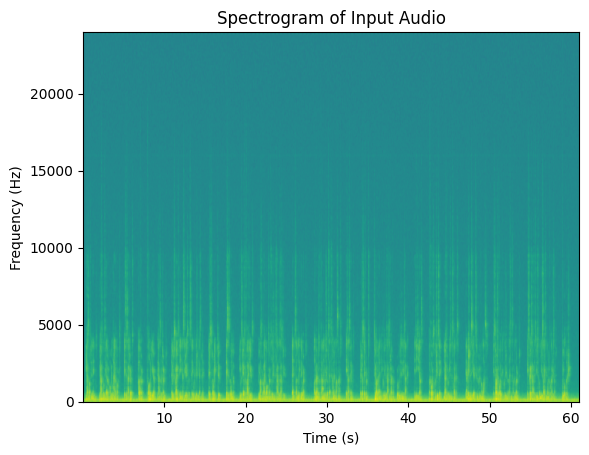

In [70]:
import matplotlib.pyplot as plt

# Plot the spectrogram for input audio
plt.specgram(input_audio, Fs=sr, NFFT=512, noverlap=256)
plt.title('Spectrogram of Input Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


In [71]:
# Calculate the Signal Power as the power of the chirp signal
# Assuming the chirp signal is in a specific frequency bin, adjust as needed
chirp_freq_bin = np.argmax(f_input > 20000)
signal_power_input = np.sum(power_input[chirp_freq_bin, :])

# Calculate the Interference Power as the power outside the chirp frequency bin
interference_power_input = np.sum(np.delete(power_input, chirp_freq_bin, axis=0))

# Calculate SIR for the input audio
sir_input = 10 * np.log10(signal_power_input / interference_power_input)

# Calculate the Signal Power as the power of the separated chirp signal
signal_power_sep = np.sum(power_sep[chirp_freq_bin, :])

# Calculate the Interference Power as the power outside the chirp frequency bin
interference_power_sep = np.sum(np.delete(power_sep, chirp_freq_bin, axis=0))

# Calculate SIR for the separated audio
sir_sep = 10 * np.log10(signal_power_sep / interference_power_sep)

print("SIR before separation:", sir_input)
print("SIR after separation:", sir_sep)

SIR before separation: -72.50226020812988
SIR after separation: -71.12096786499023


# Compute the RMS

In [72]:
import librosa

# Load the original audio
original_audio, sr = librosa.load("tabletop01_speech01.wav", sr=None)

# Compute the RMS amplitude of the original audio
original_rms = librosa.feature.rms(y=original_audio)[0]

# Load the separated audio
separated_audio, sr = librosa.load(output_file, sr=None)

# Compute the RMS amplitude of the separated audio
separated_rms = librosa.feature.rms(y=separated_audio)[0]

# Compare the RMS amplitudes
print("RMS Amplitude Before Separation:", np.mean(original_rms))
print("RMS Amplitude After Separation:", np.mean(separated_rms))


RMS Amplitude Before Separation: 0.0031118805
RMS Amplitude After Separation: 0.0031120118


# Evaluate SAR And SNR

In [73]:
File, _ = librosa.load(input_audio_file, sr=sr)
file_speech1 = "speech01.wav"
file_speech, _ = librosa.load(file_speech1, sr=sr)
separated_file_speech = output_file
separated__file, _ = librosa.load(separated_file_speech, sr=sr)
min_length = min(len(file_speech), len(File),len(separated__file))
file_speech = file_speech[:min_length]
File = File[:min_length]
separated__file = separated__file[:min_length]
# Evaluate separation performance before separation
snr_before, sir_before, sar_before, _ = mir_eval.separation.bss_eval_sources(file_speech, File)

# Evaluate separation performance after separation
snr_after, sir_after, sar_after, _ = mir_eval.separation.bss_eval_sources(file_speech, separated__file)
# Print the results
print("Before Separation:")
print("SAR And SNR:", snr_before)

print("\nAfter Separation:")
print("SAR And SNR:", snr_after)


Before Separation:
SAR And SNR: [-22.89784523]

After Separation:
SAR And SNR: [-22.89861886]
